## Part 1 - Grouping slangs into mono- and polysemous

In [12]:
import pandas as pd
import numpy as np
import random

In [16]:
all_slangs = pd.read_csv("data/filtered_featured_slang_words.csv")
old_slang_list = pd.read_csv("slang_words_100.csv")
old_slang_list = old_slang_list.loc[:,"selected_words"]

In [8]:
all_slangs.shape

(2644, 2)

In [22]:
old_slang_list = list(old_slang_list)
old_slang_list

['whadja',
 'gotsta',
 'pecker',
 'sport',
 'rehab',
 'bumfuck',
 'YooKay',
 'dafuq',
 'bowl',
 'bromance',
 'gnarly',
 'pregos',
 'threads',
 'rehab',
 'God',
 'gunt',
 'spam',
 'KMT',
 'hells',
 'F2F',
 'crappy',
 'dis',
 'rachet',
 'jill',
 'blowjob',
 'tweeker',
 'tool',
 'walkie',
 'booty',
 'spec',
 'gag',
 'duckface',
 'rad',
 'revert',
 'compy',
 'locks',
 'next-level',
 'okee-doke',
 'whooty',
 'shtick',
 'TBA',
 'Bible-thumping',
 'skeeter',
 'crock',
 'tl;dr',
 'lame-o',
 'zooted',
 'DFTBA',
 'twit',
 'ent',
 'horribad',
 'slack-jawed',
 'gansta',
 'money',
 'carny',
 'spec',
 'a-list',
 'kosher',
 'SCNR',
 'motherfucking',
 'crossfade',
 'grub',
 'gridlock',
 'trisexual',
 'sesh',
 'AWOL',
 'freckle',
 'wut',
 'zounds',
 'sicc',
 'spec-ops',
 'fire',
 'bodice-ripper',
 'BFFL',
 'WOYM',
 'gayborhood',
 'shiesty',
 'shiznat',
 'lemme',
 'GLHF',
 'sis',
 'fap',
 'bomb',
 'thirsty',
 'streak',
 'workaround',
 'conniption',
 'soused',
 'CBA',
 'styling',
 'IBT',
 'mozzie',
 'gru

In [19]:
## new_slangs = []
## slang_homonyms = []
## deleted_words = []

In [141]:
## new_slangs.append(old_slang_list.pop())
## slang_homonyms.append(old_slang_list.pop())
## deleted_words.append(old_slang_list.pop())
## print(old_slang_list[-2:])

[]


In [145]:
len(new_slangs), len(slang_homonyms), len(deleted_words)

(46, 34, 16)

In [147]:
pd.DataFrame(new_slangs).to_csv("word-lists/monosemous_slangs.csv")
pd.DataFrame(slang_homonyms).to_csv("word-lists/polysemous_slangs.csv")
pd.DataFrame(deleted_words).to_csv("word-lists/deleted_words.csv")

## Part 2 - Sampling new slangs

In [18]:
mono_slangs = pd.read_csv("word-lists/monosemous_slangs.csv")
poly_slangs = pd.read_csv("word-lists/polysemous_slangs.csv")
all_slangs = pd.read_csv("word-lists/filtered_featured_slang_words.csv")
print(len(mono_slangs), len(poly_slangs), len(all_slangs))

46 34 2644


In [19]:
mono_slangs = list(mono_slangs.iloc[:,1])
poly_slangs = list(poly_slangs.iloc[:,1])
all_slangs = list(all_slangs.iloc[:,1])

#### Pipeline
* Sample slang from all slangs
* If slang is abbreviation or multiword expression or exists in slang lists, continue
* Elif slang is in MW with a different definition than in OSD (as is or stemmed version) and is not labeled informal or slang, add to poly_slangs
* Else, add to monoslangs

Note: slangs with multiple slang meanings but no non-slang meanings are put in the mono category

In [469]:
slang = random.sample(all_slangs, 1)[0]
print(slang)
print(slang in mono_slangs)
print(slang in poly_slangs)

down
False
False


In [470]:
#mono_slangs.append(slang)
poly_slangs.append(slang)
#mono_slangs.append("bupkis")
#poly_slangs.append("beef")
print(len(mono_slangs), len(poly_slangs))

100 100


In [471]:
pd.DataFrame(mono_slangs).to_csv("word-lists/100_monosemous_slangs.csv")
pd.DataFrame(poly_slangs).to_csv("word-lists/100_polysemous_slangs.csv")

## Compare frequency distributions

In [480]:
import wordfreq
import matplotlib.pyplot as plt

In [490]:
nonslangs = pd.read_csv("word-lists/nonslang_words_100.csv")
nonslangs = list(nonslangs.iloc[:,2])

In [477]:
mono_freqs = []
for word in mono_slangs:
    mono_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))
poly_freqs = []
for word in poly_slangs:
    poly_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))
nonslang_freqs = []
for word in nonslangs:
    nonslang_freqs.append(wordfreq.word_frequency(word, lang='en', wordlist='best', minimum=0.0))

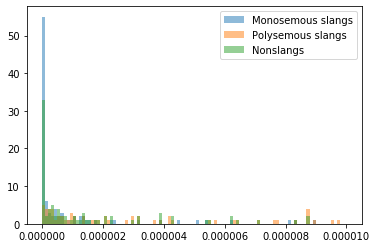

In [499]:
bins = np.linspace(0, 0.00001, 100)
plt.hist(mono_freqs, bins, alpha=0.5, label='Monosemous slangs')
plt.hist(poly_freqs, bins, alpha=0.5, label='Polysemous slangs')
plt.hist(nonslang_freqs, bins, alpha=0.5, label='Nonslangs')
plt.legend(loc='upper right')
plt.show()

In [505]:
print(sum(np.array(nonslang_freqs) >= 0.00001))
print(sum(np.array(poly_freqs) >= 0.00001))

12
38
